# Jabal Omar's Financial Analysis

This notebook performs a comprehensive financial analysis of Jabal Omar Saudi company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Jabal Omar raw data from the CSV file
jabal_omar_raw_data = pd.read_csv('jabal_omar_data.csv')

# Display the first few rows to understand the data structure
jabal_omar_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Jabel Omar,Real Estate Development,885220,635104,6858,26287576,17972572
1,2020,Jabel Omar,Real Estate Development,176682,1339006,790781,25736881,18748140
2,2021,Jabel Omar,Real Estate Development,310360,946210,-432350,26822580,18194350
3,2022,Jabel Omar,Real Estate Development,849500,-176780,-352430,26512470,13825760
4,2023,Jabel Omar,Real Estate Development,1326720,226460,37480,27282700,14559880


In [3]:
# Get a summary of the dataset including data types and non-null counts
jabal_omar_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Jabal Omar’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
jabal_omar_raw_data = jabal_omar_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
jabal_omar_raw_data[numeric_cols] = jabal_omar_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
jabal_omar_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Jabel Omar,Real Estate Development,885220.0,635104.0,6858.0,26287576.0,17972572.0
1,2020,Jabel Omar,Real Estate Development,176682.0,1339006.0,790781.0,25736881.0,18748140.0
2,2021,Jabel Omar,Real Estate Development,310360.0,946210.0,-432350.0,26822580.0,18194350.0
3,2022,Jabel Omar,Real Estate Development,849500.0,-176780.0,-352430.0,26512470.0,13825760.0
4,2023,Jabel Omar,Real Estate Development,1326720.0,226460.0,37480.0,27282700.0,14559880.0
5,2024,Jabel Omar,Real Estate Development,1901400.0,382840.0,200090.0,27554490.0,14083150.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
jabal_omar_new_data = jabal_omar_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
jabal_omar_new_data['Revenue_Growth_%'] = jabal_omar_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(jabal_omar_new_data['Revenue_SAR'].iloc[0], jabal_omar_new_data['Revenue_SAR'].iloc[-1], len(jabal_omar_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 16.52%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
jabal_omar_new_data['Operating_Margin_%'] = (jabal_omar_new_data['Operating_Income_SAR'] / jabal_omar_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
jabal_omar_new_data['Net_Profit_Margin_%'] = (jabal_omar_new_data['Net_Income_SAR'] / jabal_omar_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(jabal_omar_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019            0.774723            71.745329
1  2020          447.573041           757.862148
2  2021         -139.305967           304.874984
3  2022          -41.486757           -20.809888
4  2023            2.825012            17.069163
5  2024           10.523299            20.134638


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
jabal_omar_new_data['Liabilities_to_Assets_Ratio'] = (jabal_omar_new_data['Total_Liabilities_SAR'] / jabal_omar_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
jabal_omar_new_data['Asset_Turnover_Ratio'] = jabal_omar_new_data['Revenue_SAR'] / jabal_omar_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(jabal_omar_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    68.369073              0.033674
1  2020                    72.845424              0.006865
2  2021                    67.832214              0.011571
3  2022                    52.148140              0.032042
4  2023                    53.366712              0.048629
5  2024                    51.110182              0.069005


## Visualizations

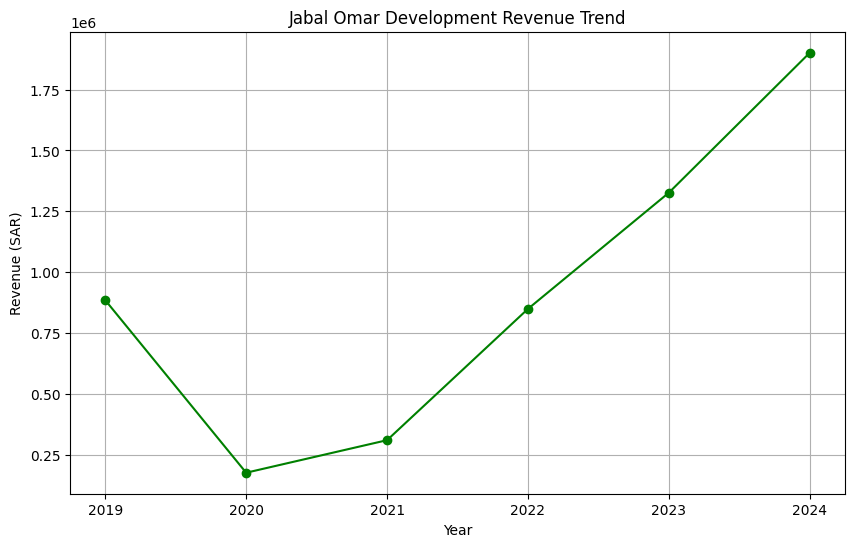

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(jabal_omar_new_data["Year"], jabal_omar_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Jabal Omar Development Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

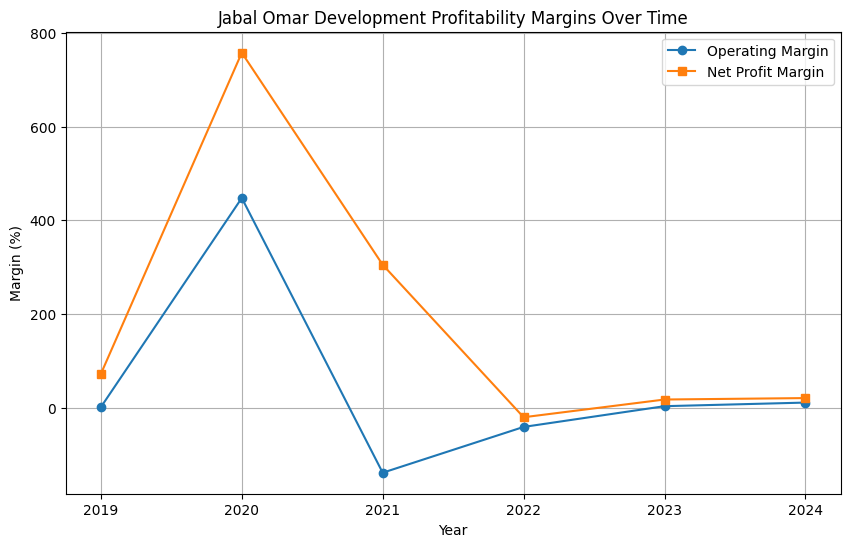

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(jabal_omar_new_data["Year"], jabal_omar_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(jabal_omar_new_data["Year"], jabal_omar_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Jabal Omar Development Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
jabal_omar_new_data.to_csv('jabal_omar_analysis_results.csv', index=False)
print("Analysis results saved to 'jabal_omar_analysis_results.csv'")

Analysis results saved to 'jabal_omar_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Jabal Omar's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.